In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

In [7]:
# train = pd.read_csv('./Weather-Energy_rev_data.csv')
# test = pd.read_csv('./Weather-Energy_rev_data.csv')
# df = pd.read_csv('./Weather-Energy_rev_data.csv')

train = pd.read_csv('../Data/ProductionData/Weather-Energy_rev_data.csv')
test = pd.read_csv('../Data/ProductionData/Weather-Energy_rev_data.csv')
df = pd.read_csv('../Data/ProductionData/Weather-Energy_rev_data.csv')

In [8]:
print(train.head())

              time  temperature  rain  wind_direction(deg)  wind_speed(m/s)  \
0  2019-07-01 0:00    23.271429   0.0           214.671429         1.171429   
1  2019-07-01 0:15    23.271429   0.0           214.671429         1.171429   
2  2019-07-01 0:30    23.200000   0.0           225.486667         1.306667   
3  2019-07-01 0:45    23.200000   0.0           223.140000         0.646667   
4  2019-07-01 1:00    23.200000   0.0           252.066667         1.053333   

   air_pressure(hPa)  sea_pressuer(hPa)  humidity(%)  solar_radiation(MJ/m^2)  \
0         997.378571        1003.878571    84.457143                      0.0   
1         997.378571        1003.878571    84.457143                      0.0   
2         997.266667        1003.766667    84.853333                      0.0   
3         997.200000        1003.700000    85.280000                      0.0   
4         997.200000        1003.700000    85.560000                      0.0   

   solar_energy(Sec)  energy  
0      

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 11 columns):
time                       35125 non-null object
temperature                35111 non-null float64
rain                       33595 non-null float64
wind_direction(deg)        34844 non-null float64
wind_speed(m/s)            35111 non-null float64
air_pressure(hPa)          35111 non-null float64
sea_pressuer(hPa)          35111 non-null float64
humidity(%)                35111 non-null float64
solar_radiation(MJ/m^2)    35125 non-null float64
solar_energy(Sec)          35125 non-null float64
energy                     34837 non-null float64
dtypes: float64(10), object(1)
memory usage: 2.9+ MB


In [14]:
train = train.dropna(axis=0)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33040 entries, 0 to 35124
Data columns (total 11 columns):
time                       33040 non-null object
temperature                33040 non-null float64
rain                       33040 non-null float64
wind_direction(deg)        33040 non-null float64
wind_speed(m/s)            33040 non-null float64
air_pressure(hPa)          33040 non-null float64
sea_pressuer(hPa)          33040 non-null float64
humidity(%)                33040 non-null float64
solar_radiation(MJ/m^2)    33040 non-null float64
solar_energy(Sec)          33040 non-null float64
energy                     33040 non-null float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


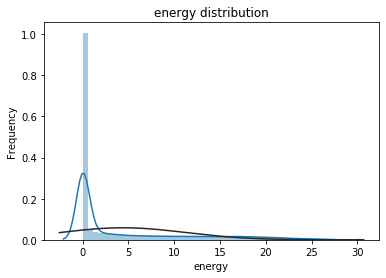

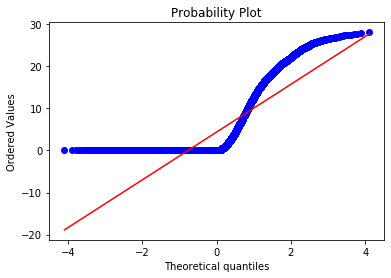

In [16]:
sns.distplot(train['energy'],fit=norm);

plt.ylabel('Frequency')
plt.title('energy distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['energy'], plot=plt)
plt.show() 

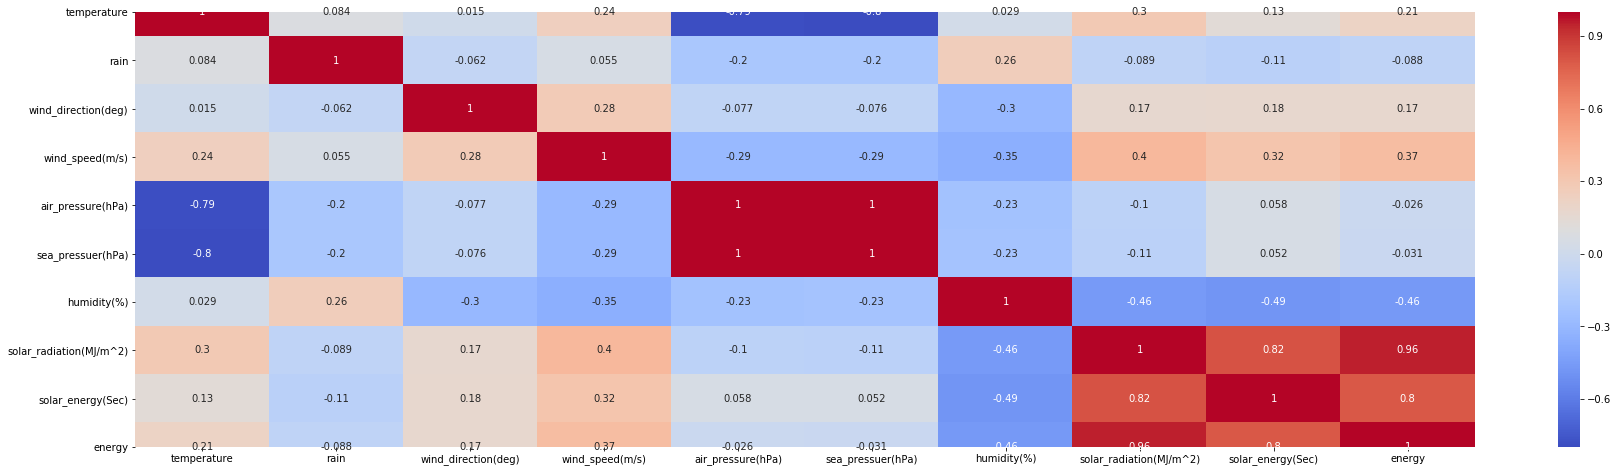

In [17]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [19]:
corr = train.corr()
# drop columns with correlations less than 0.2
corr[corr['energy']>0.2].index
train = train[['temperature', 'wind_speed(m/s)', 'solar_radiation(MJ/m^2)',
       'solar_energy(Sec)', 'energy']]
test = train[['temperature','wind_speed(m/s)', 'solar_radiation(MJ/m^2)', 'solar_energy(Sec)']]
test_ans = train[['energy']]

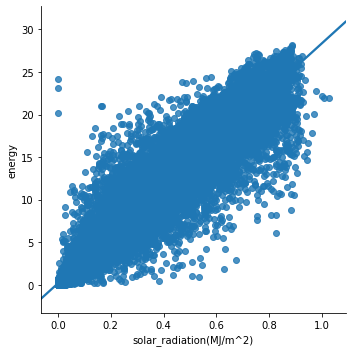

In [20]:
sns.lmplot(x='solar_radiation(MJ/m^2)',y='energy',data=train)

In [21]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
energy,0,0.0
solar_energy(Sec),0,0.0
solar_radiation(MJ/m^2),0,0.0
wind_speed(m/s),0,0.0
temperature,0,0.0


In [22]:
train.isnull().sum().sort_values(ascending=False).head(20)

energy                     0
solar_energy(Sec)          0
solar_radiation(MJ/m^2)    0
wind_speed(m/s)            0
temperature                0
dtype: int64

In [23]:
train['wind_speed(m/s)']=train['wind_speed(m/s)'].fillna(method='bfill')
train['temperature']=train['temperature'].fillna(method='bfill')
train=train.dropna(axis=0)

In [24]:
train.isnull().sum().sort_values(ascending=False).head(20)

energy                     0
solar_energy(Sec)          0
solar_radiation(MJ/m^2)    0
wind_speed(m/s)            0
temperature                0
dtype: int64

In [25]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
solar_energy(Sec),0,0.0
solar_radiation(MJ/m^2),0,0.0
wind_speed(m/s),0,0.0
temperature,0,0.0


Before >  Mean: 4.386914, Standard Deviation: 6.814314


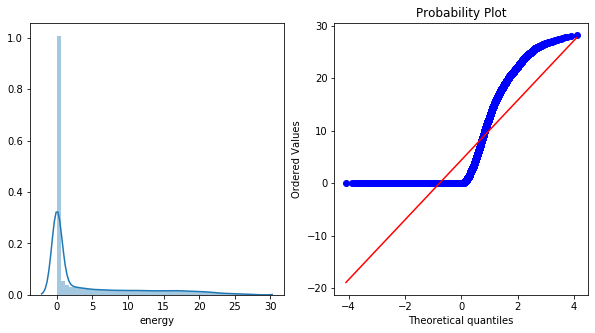

In [26]:
fig, ax= plt.subplots(1,2, figsize = (10,5))
print("Before >  Mean: %f, Standard Deviation: %f" %norm.fit(train['energy']))
sns.distplot(train['energy'], ax = ax[0])
stats.probplot(train['energy'], plot=ax[1])
plt.show()

In [ ]:
test['wind_speed(m/s)']=test['wind_speed(m/s)'].fillna(method='bfill')

In [ ]:
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'energy')['energy'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('energy', axis=1), train['energy'], test_size=0.3, random_state=101)

# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)


In [ ]:
X_test.shape

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

In [ ]:
from sklearn import metrics

def show_predict(y_test,predictions):
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,predictions)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()

    plt.figure(figsize=(32,16))
    plt.plot(y_test,label ='Test')
    plt.plot(predictions, label = 'predict')
    plt.show()

def show_errors(y_test,predictions):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# Gradient Boosting Regression
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [ ]:
# Support Vecotr Machine Regression
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [ ]:
# Light GBM
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
model_lgb.fit(X_train,y_train)

lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [ ]:
start = df[df['time']=="2020-05-31 0:00"].index.tolist()[0]
end = df[df['time']=="2020-05-31 23:45"].index.tolist()[0]

In [ ]:
test1 = test[start:end]
test1 = sc_X.fit_transform(test1)

In [ ]:
test_predictions = lm.predict(test1)
test_predictions= test_predictions.reshape(-1,1)
test_predictions =sc_y.inverse_transform(test_predictions)

test_clf_pred=clf.predict(test1)
test_clf_pred= test_clf_pred.reshape(-1,1)
test_clf_pred=sc_y.inverse_transform(test_clf_pred)

test_dtr_pred = dtreg.predict(test1)
test_dtr_pred= test_dtr_pred.reshape(-1,1)
test_dtr_pred=sc_y.inverse_transform(test_dtr_pred)

test_rfr_pred= rfr.predict(test1)
test_rfr_pred = test_rfr_pred.reshape(-1,1)
test_rfr_pred=sc_y.inverse_transform(test_rfr_pred)

test_lgb_pred = model_lgb.predict(test1)
test_lgb_pred = test_lgb_pred.reshape(-1,1)
test_lgb_pred=sc_y.inverse_transform(test_lgb_pred)

final_predictions = (test_predictions+test_clf_pred+test_dtr_pred+test_rfr_pred)/4


In [ ]:
plt.title("Linear Regression")
plt.plot(test_predictions)
plt.show()

In [ ]:
plt.title("Gradient Boosting Regression")
plt.plot(test_clf_pred)
plt.show()

In [ ]:
plt.title("Decision Tree Regression")
plt.plot(test_dtr_pred)
plt.show()

In [ ]:
plt.title("Support Vector Machine Regression")
plt.plot(test_rfr_pred)
plt.show()

In [ ]:
plt.title("Light GBM")
plt.plot(test_lgb_pred)
plt.show()

In [ ]:
plt.title("Final")
plt.plot(final_predictions)
plt.show()

In [ ]:
final_data=[]


for i in range(0, len(final_predictions)-3, 4):
    final_data.append(final_predictions[i:i+4].sum())

final_data.append(0)


In [ ]:
len(final_data)
final_data